# MADE(MAIL DETECTION) PROJECT 

**IN THIS PROJECT, IT DETECTS WHETHER THE MAIL IS SPAM OR HAM**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [58]:
data = pd.read_csv(r"C:\Users\r.lavanya\Desktop\mailSH.csv",encoding='latin-1')

In [59]:
print(data)

      Category                                              Mails Unnamed: 2  \
0          ham  Go until jurong point, crazy.. Available only ...        NaN   
1          ham                      Ok lar... Joking wif u oni...        NaN   
2         spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3          ham  U dun say so early hor... U c already then say...        NaN   
4          ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...        ...                                                ...        ...   
11139     spam  This is the 2nd time we have tried 2 contact u...        NaN   
11140      ham               Will ü b going to esplanade fr home?        NaN   
11141      ham  Pity, * was in mood for that. So...any other s...        NaN   
11142      ham  The guy did some bitching but I acted like i'd...        NaN   
11143      ham                         Rofl. Its true to its name        NaN   

      Unnamed: 3 Unnamed: 4  
0        

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    11144 non-null  object
 1   Mails       11144 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 435.4+ KB


In [61]:
data.describe().T

,count,unique,top,freq
Category,11144,2,ham,9650
Mails,11144,5843,"Sorry, I'll call later",60
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [62]:
mail_data = data.where((pd.notnull(data)),'')

In [63]:
mail_data.head()

,Category,Mails,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [64]:
mail_data.shape

(11144, 5)

In [65]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [66]:
X = mail_data['Mails']
Y = mail_data['Category']

In [67]:
print(X)

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
11139    This is the 2nd time we have tried 2 contact u...
11140                 Will ü b going to esplanade fr home?
11141    Pity, * was in mood for that. So...any other s...
11142    The guy did some bitching but I acted like i'd...
11143                           Rofl. Its true to its name
Name: Mails, Length: 11144, dtype: object


In [68]:
print(Y)

0        1
1        1
2        0
3        1
4        1
        ..
11139    0
11140    1
11141    1
11142    1
11143    1
Name: Category, Length: 11144, dtype: object


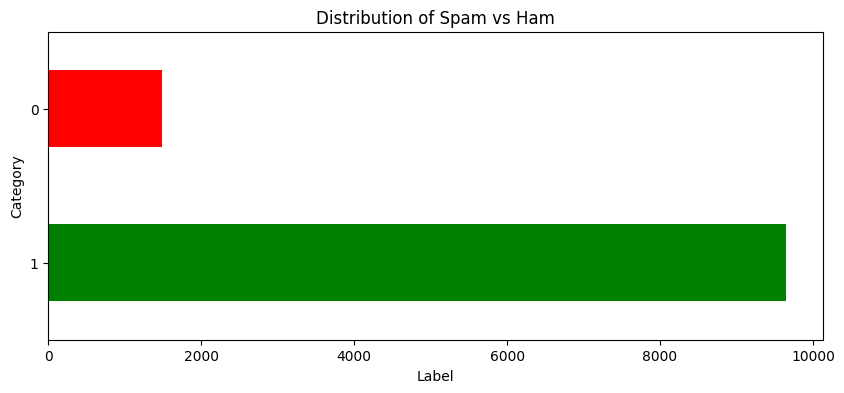

In [69]:
plt.figure(figsize=(10, 4))
mail_data['Category'].value_counts().plot(kind='barh', color=['green', 'red'])
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Label')
plt.show()


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [71]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(11144,)
(8915,)
(2229,)


In [72]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [73]:
print(X_train)

11118           Ic. There are a lotta childporn cars then.
2099     SMS SERVICES. for your inclusive text credits,...
10222    Please protect yourself from e-threats. SIB ne...
8878     Ee msg na poortiyagi odalebeku: Hanumanji 7 na...
9732              Now got tv 2 watch meh? U no work today?
                               ...                        
6400                                Hey. You got any mail?
9160     Our ride equally uneventful - not too many of ...
9859     Congrats. That's great. I wanted to tell you n...
1688                      Nan sonathaya soladha. Why boss?
5994     Someone has contacted our dating service and e...
Name: Mails, Length: 8915, dtype: object


In [74]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 69394 stored elements and shape (8915, 8259)>
  Coords	Values
  (0, 3838)	0.4890267558613184
  (0, 4521)	0.4997639671770524
  (0, 1929)	0.5298473142278106
  (0, 1804)	0.47994857304588834
  (1, 6696)	0.17790421493091527
  (1, 6453)	0.21449871664830328
  (1, 3909)	0.2496998906138615
  (1, 7269)	0.14350843498566054
  (1, 2237)	0.2308663304404731
  (1, 5611)	0.15569474691539967
  (1, 3434)	0.23891881902195078
  (1, 8150)	0.16026680349099073
  (1, 2104)	0.24664601050111665
  (1, 5072)	0.20528095458283022
  (1, 4479)	0.23891881902195078
  (1, 7672)	0.21908388080819124
  (1, 6947)	0.1523018002590624
  (1, 2939)	0.22592711307190821
  (1, 1871)	0.2134480818889823
  (1, 3647)	0.18112898339201905
  (1, 78)	0.288276972421547
  (1, 5621)	0.1950772227433886
  (1, 1583)	0.288276972421547
  (1, 3997)	0.23891881902195078
  (1, 633)	0.23891881902195078
  :	:
  (8911, 2312)	0.4352622114452653
  (8912, 7235)	0.3967302454311402
  (8912, 4634)	0.

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [77]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [78]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.981491867638811


In [79]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [80]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
input_mail = input("Enter your mail content: ")  
input_mail = [input_mail]  
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("\033[1;32mHam mail\033[0m")  
else:
    print("\033[1;31mSpam mail\033[0m")  

Enter your mail content:  WINNER!! As a valued network customer you have been selected to receivea ?900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


Spam mail


Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Score: 0.9924845765563657
Test Accuracy: 0.9928218932256617
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       324
        spam       0.99      1.00      1.00      1905

    accuracy                           0.99      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       0.99      0.99      0.99      2229



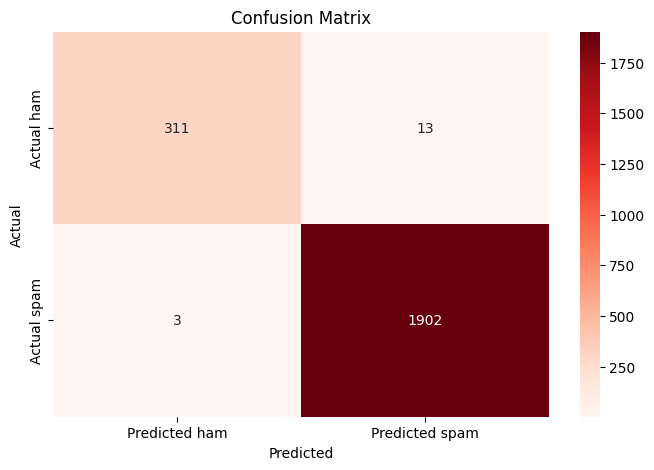

In [84]:
nb = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

# GridSearch with cross-validation
grid = GridSearchCV(nb, param_grid, cv=5)
grid.fit(X_train_features, Y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Test accuracy
Y_pred = best_model.predict(X_test_features)
print("Test Accuracy:", accuracy_score(Y_test, Y_pred))

# Classification report
print(classification_report(Y_test, Y_pred, target_names=['ham', 'spam']))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
labels = ['Actual ham', 'Actual spam']

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted ham', 'Predicted spam'], yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
